### Thesis: Implementation and Validation of a Decision Tree-Based Approach for Interpretable Supervised Clustering

#### Dataset: "Breast Cancer Wisconsin (Diagnostic)"

Importing libraries

In [4]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

Configuration to improve the display of DataFrame pandas

In [7]:
pd.set_option('display.width', 120)  # Total width of the print
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('max_colwidth', None)  # Prevents truncation of content

#### Exploratory Data Analysis

Loading the dataset

In [11]:
data = load_breast_cancer()

Visualization of the dataset

In [14]:
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  \
0        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001   
1        20.57         17.77          132.90     1326.0          0.08474           0.07864          0.0869   
2        19.69         21.25          130.00     1203.0          0.10960           0.15990          0.1974   
3        11.42         20.38           77.58      386.1          0.14250           0.28390          0.2414   
4        20.29         14.34          135.10     1297.0          0.10030           0.13280          0.1980   

   mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  \
0              0.14710         0.2419                 0.07871        1.0950         0.9053            8.589   
1              0.07017         0.1812                 0.05667        0.5435         0.7339            3.398   
2     

Size of the dataset

In [17]:
print(df.shape)

(569, 30)


Check for null values

In [20]:
print(df.isnull().values.any())

False


Check for duplicate rows

In [23]:
print(df.duplicated().sum())

0


Basic statistics divided by the 3 groups of variables

In [26]:
# Get descriptive statistics
desc = df.describe()

# Divide the columns into three groups
group1 = desc.iloc[:, :10]  # First 10 variables
group2 = desc.iloc[:, 10:20]  # Second group of 10 variables
group3 = desc.iloc[:, 20:30]  # Last 10 variables

# Show tables separately
print("First group of variables:")
display(group1)

print("Second group of variables:")
display(group2)

print("Third group of variables:")
display(group3)

First group of variables:


mean radius  mean texture  mean perimeter    mean area  mean smoothness  mean compactness  mean concavity  \
count   569.000000    569.000000      569.000000   569.000000       569.000000        569.000000      569.000000   
mean     14.127292     19.289649       91.969033   654.889104         0.096360          0.104341        0.088799   
std       3.524049      4.301036       24.298981   351.914129         0.014064          0.052813        0.079720   
min       6.981000      9.710000       43.790000   143.500000         0.052630          0.019380        0.000000   
25%      11.700000     16.170000       75.170000   420.300000         0.086370          0.064920        0.029560   
50%      13.370000     18.840000       86.240000   551.100000         0.095870          0.092630        0.061540   
75%      15.780000     21.800000      104.100000   782.700000         0.105300          0.130400        0.130700   
max      28.110000     39.280000      188.500000  2501.000000         0.163400          0.345400        0.426800   

       mean concave points  mean symmetry  mean fractal dimension  
count           569.000000     569.000000              569.000000  
mean              0.048919       0.181162                0.062798  
std               0.038803       0.027414                0.007060  
min               0.000000       0.106000                0.049960  
25%               0.020310       0.161900                0.057700  
50%               0.033500       0.179200                0.061540  
75%               0.074000       0.195700                0.066120  
max               0.201200       0.304000                0.097440

Second group of variables:


radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  \
count    569.000000     569.000000       569.000000  569.000000        569.000000         569.000000       569.000000   
mean       0.405172       1.216853         2.866059   40.337079          0.007041           0.025478         0.031894   
std        0.277313       0.551648         2.021855   45.491006          0.003003           0.017908         0.030186   
min        0.111500       0.360200         0.757000    6.802000          0.001713           0.002252         0.000000   
25%        0.232400       0.833900         1.606000   17.850000          0.005169           0.013080         0.015090   
50%        0.324200       1.108000         2.287000   24.530000          0.006380           0.020450         0.025890   
75%        0.478900       1.474000         3.357000   45.190000          0.008146           0.032450         0.042050   
max        2.873000       4.885000        21.980000  542.200000          0.031130           0.135400         0.396000   

       concave points error  symmetry error  fractal dimension error  
count            569.000000      569.000000               569.000000  
mean               0.011796        0.020542                 0.003795  
std                0.006170        0.008266                 0.002646  
min                0.000000        0.007882                 0.000895  
25%                0.007638        0.015160                 0.002248  
50%                0.010930        0.018730                 0.003187  
75%                0.014710        0.023480                 0.004558  
max                0.052790        0.078950                 0.029840

Third group of variables:


worst radius  worst texture  worst perimeter   worst area  worst smoothness  worst compactness  \
count    569.000000     569.000000       569.000000   569.000000        569.000000         569.000000   
mean      16.269190      25.677223       107.261213   880.583128          0.132369           0.254265   
std        4.833242       6.146258        33.602542   569.356993          0.022832           0.157336   
min        7.930000      12.020000        50.410000   185.200000          0.071170           0.027290   
25%       13.010000      21.080000        84.110000   515.300000          0.116600           0.147200   
50%       14.970000      25.410000        97.660000   686.500000          0.131300           0.211900   
75%       18.790000      29.720000       125.400000  1084.000000          0.146000           0.339100   
max       36.040000      49.540000       251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  worst fractal dimension  
count       569.000000            569.000000      569.000000               569.000000  
mean          0.272188              0.114606        0.290076                 0.083946  
std           0.208624              0.065732        0.061867                 0.018061  
min           0.000000              0.000000        0.156500                 0.055040  
25%           0.114500              0.064930        0.250400                 0.071460  
50%           0.226700              0.099930        0.282200                 0.080040  
75%           0.382900              0.161400        0.317900                 0.092080  
max           1.252000              0.291000        0.663800                 0.207500

Boxplots for all variables

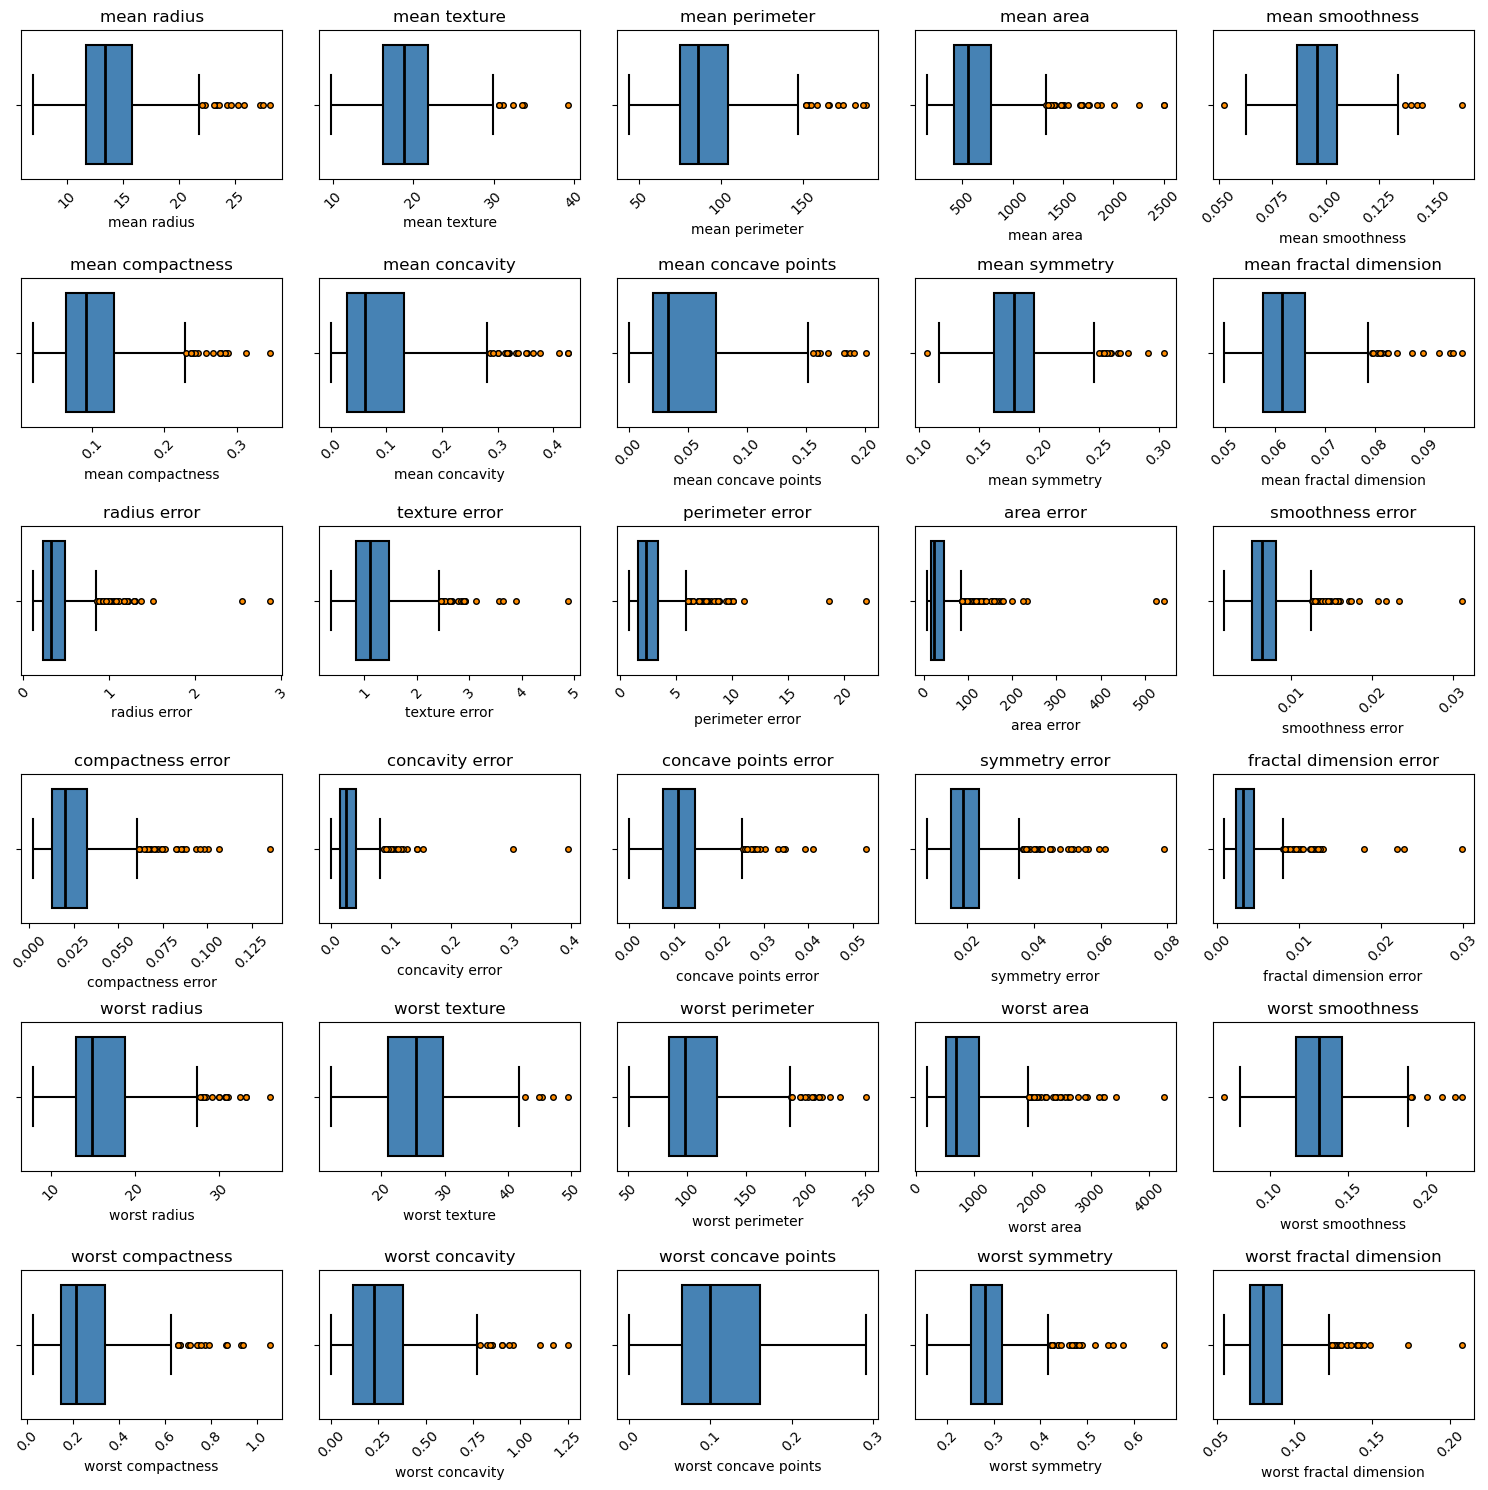

In [29]:
# Create a subplot grid
num_vars = 30
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i, var in enumerate(df.columns):  
    ax = axes[i // 5, i % 5]
    
    sns.boxplot(x=df[var], ax=ax, color='steelblue', saturation=1, fliersize=4, linewidth=1.5, 
                boxprops=dict(edgecolor='black'), 
                medianprops=dict(color='black', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='darkorange', marker='o', markeredgecolor='black', markersize=4))
    
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=45)  # Rotate labels if necessary

plt.tight_layout()
plt.show()

Histogram vs normal curve for all variables

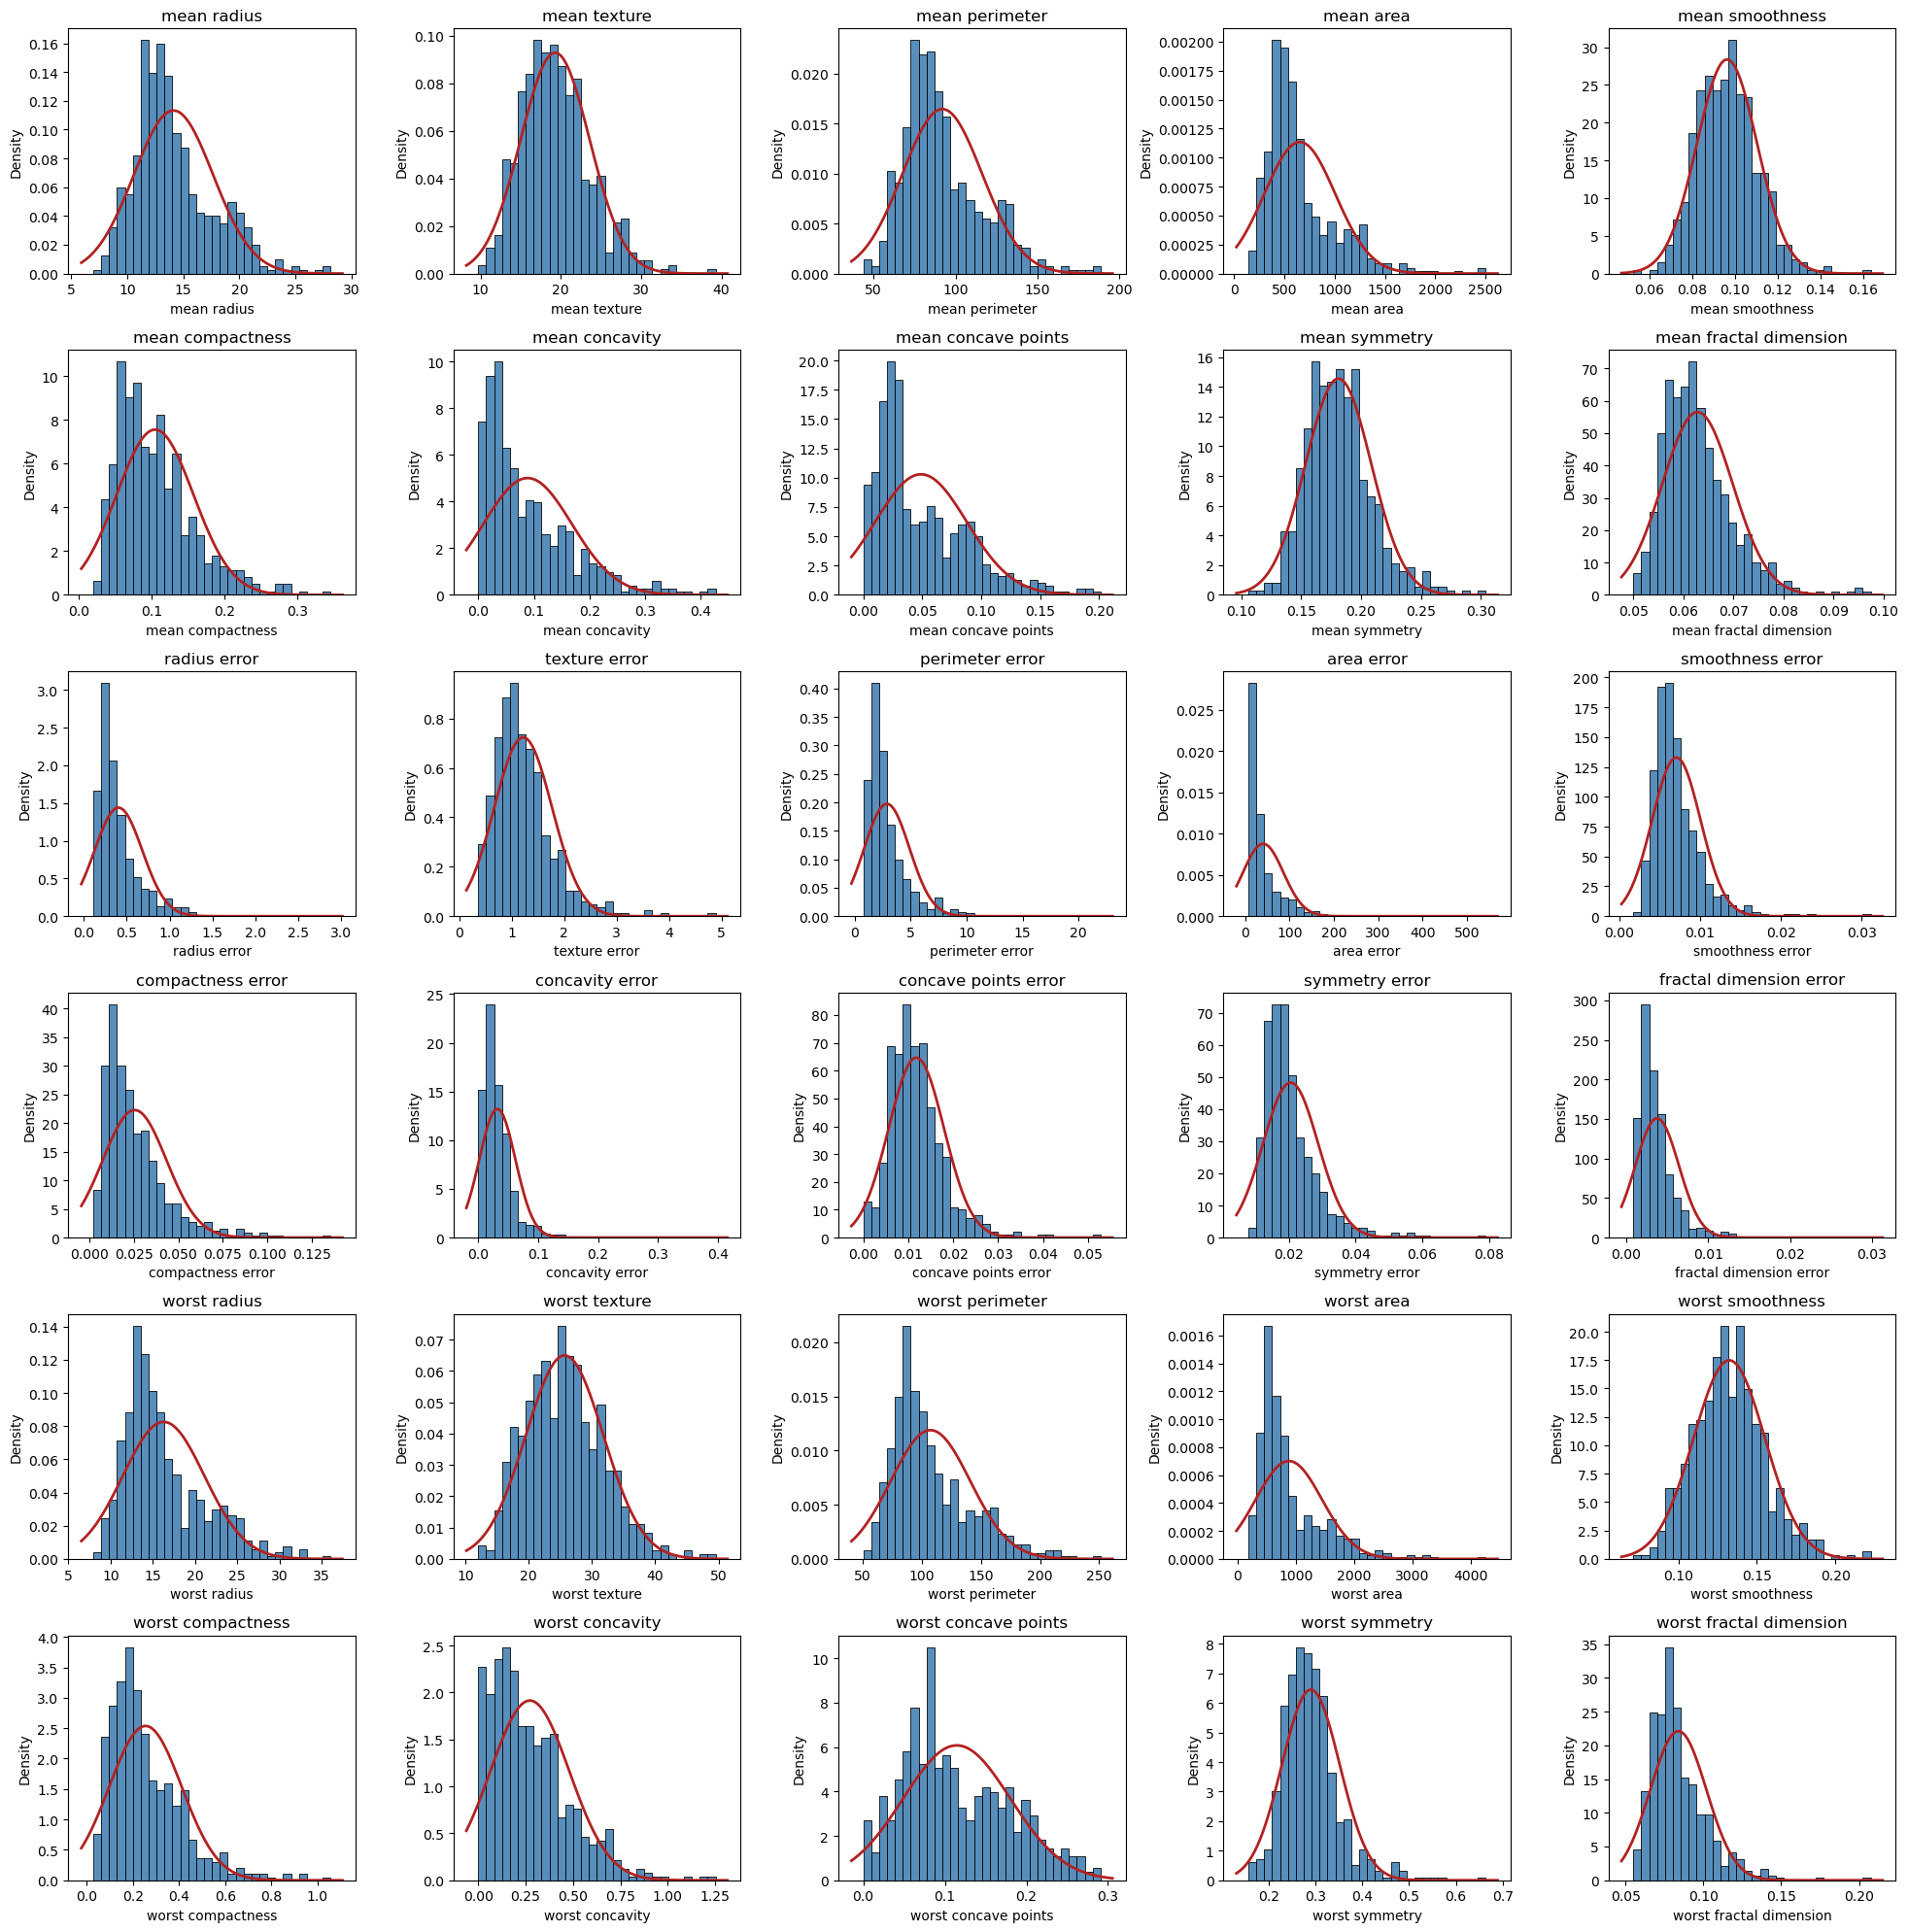

In [32]:
# Number of rows and columns for the grid
n_rows = 6  # For example, 6 lines
n_cols = 5  # For example, 5 columns

# Figure creation with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axis array to iterate easily
axes = axes.flatten()

# Iteration on variables and axes
for i, var in enumerate(df.columns):
    ax = axes[i]
    
    # Add histogram (and normal curve with kde=True) for each variable
    sns.histplot(df[var], kde=False, stat='density', bins=30, color='steelblue', alpha=0.9, ax=ax)
    
    # Add the theoretical normal curve
    mu, std = stats.norm.fit(df[var])  # Calculate mean and standard deviation
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    ax.plot(x, p, color='firebrick', linewidth=2)  # Draw the normal curve
    ax.set_title(f'{var}')
    
# Automatically resize spaces between graphs
plt.tight_layout()
plt.show()

Heatmap of correlations

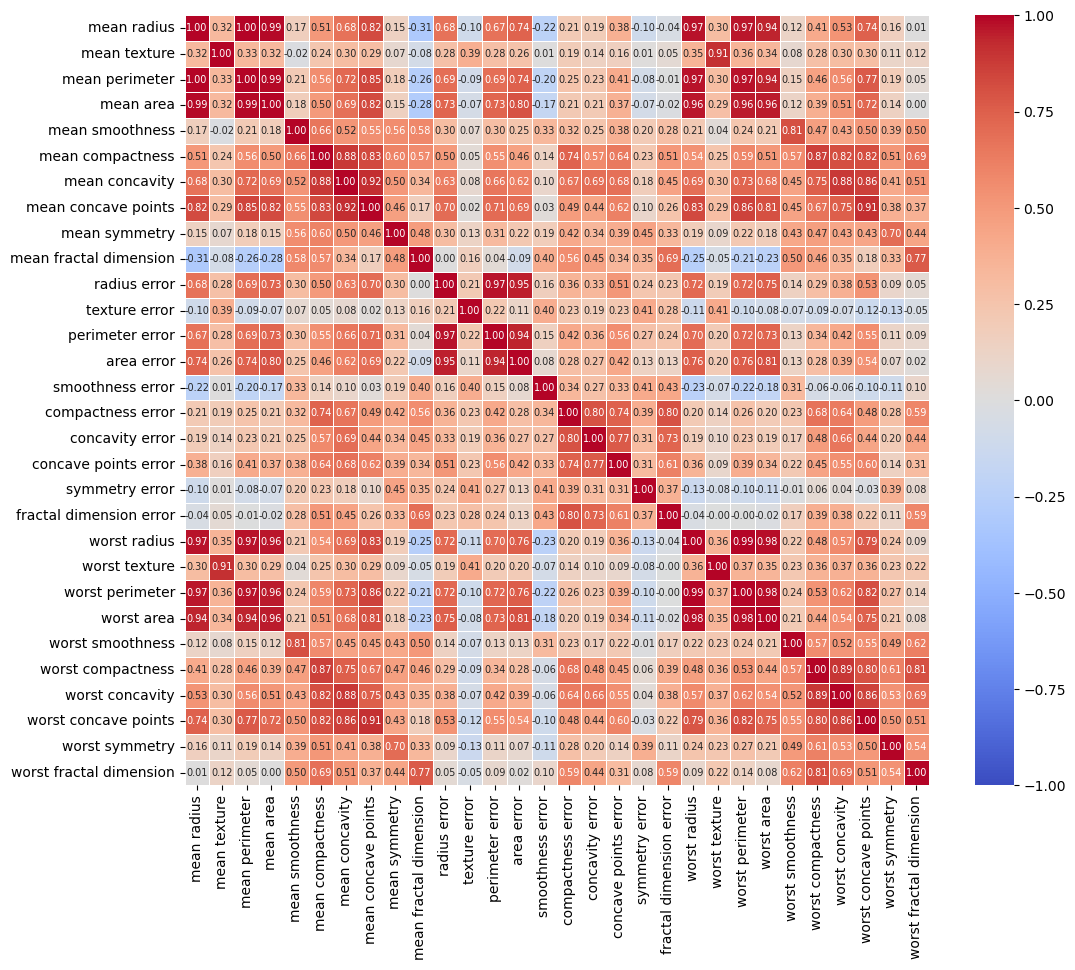

In [35]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create heatmap without mask to show all correlations
plt.figure(figsize=(12, 10))  # Set appropriate size to display all variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1,
            annot_kws={'size': 7})  # Set text size

# Show graph
plt.show()

Bar graph for counting observations

C:\Users\guder\AppData\Local\Temp\ipykernel_26660\183908009.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette={'Malignant': 'darkorange', 'Benign': 'steelblue'})


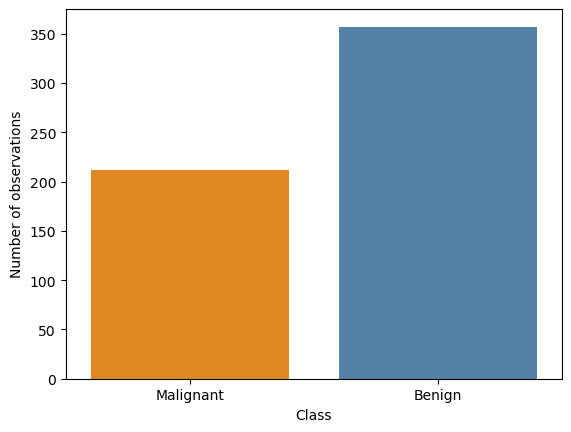

In [38]:
# Add classification of observations
df['class'] = data.target

# Create a mapping between numbers and labels
class_mapping = {0: 'Malignant', 1: 'Benign'}

# Apply mapping
df['class'] = df['class'].map(class_mapping)

# Create bar graph with modified labels
sns.countplot(data=df, x='class', palette={'Malignant': 'darkorange', 'Benign': 'steelblue'})

# Add labels
plt.xlabel('Class')
plt.ylabel('Number of observations')

plt.show()

Pair plots for mean variables divided by tumor type

C:\Users\guder\AppData\Local\Temp\ipykernel_26660\2221510941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['class'] = data.target
C:\Users\guder\AppData\Local\Temp\ipykernel_26660\2221510941.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['class'] = df_subset['class'].map(class_mapping)


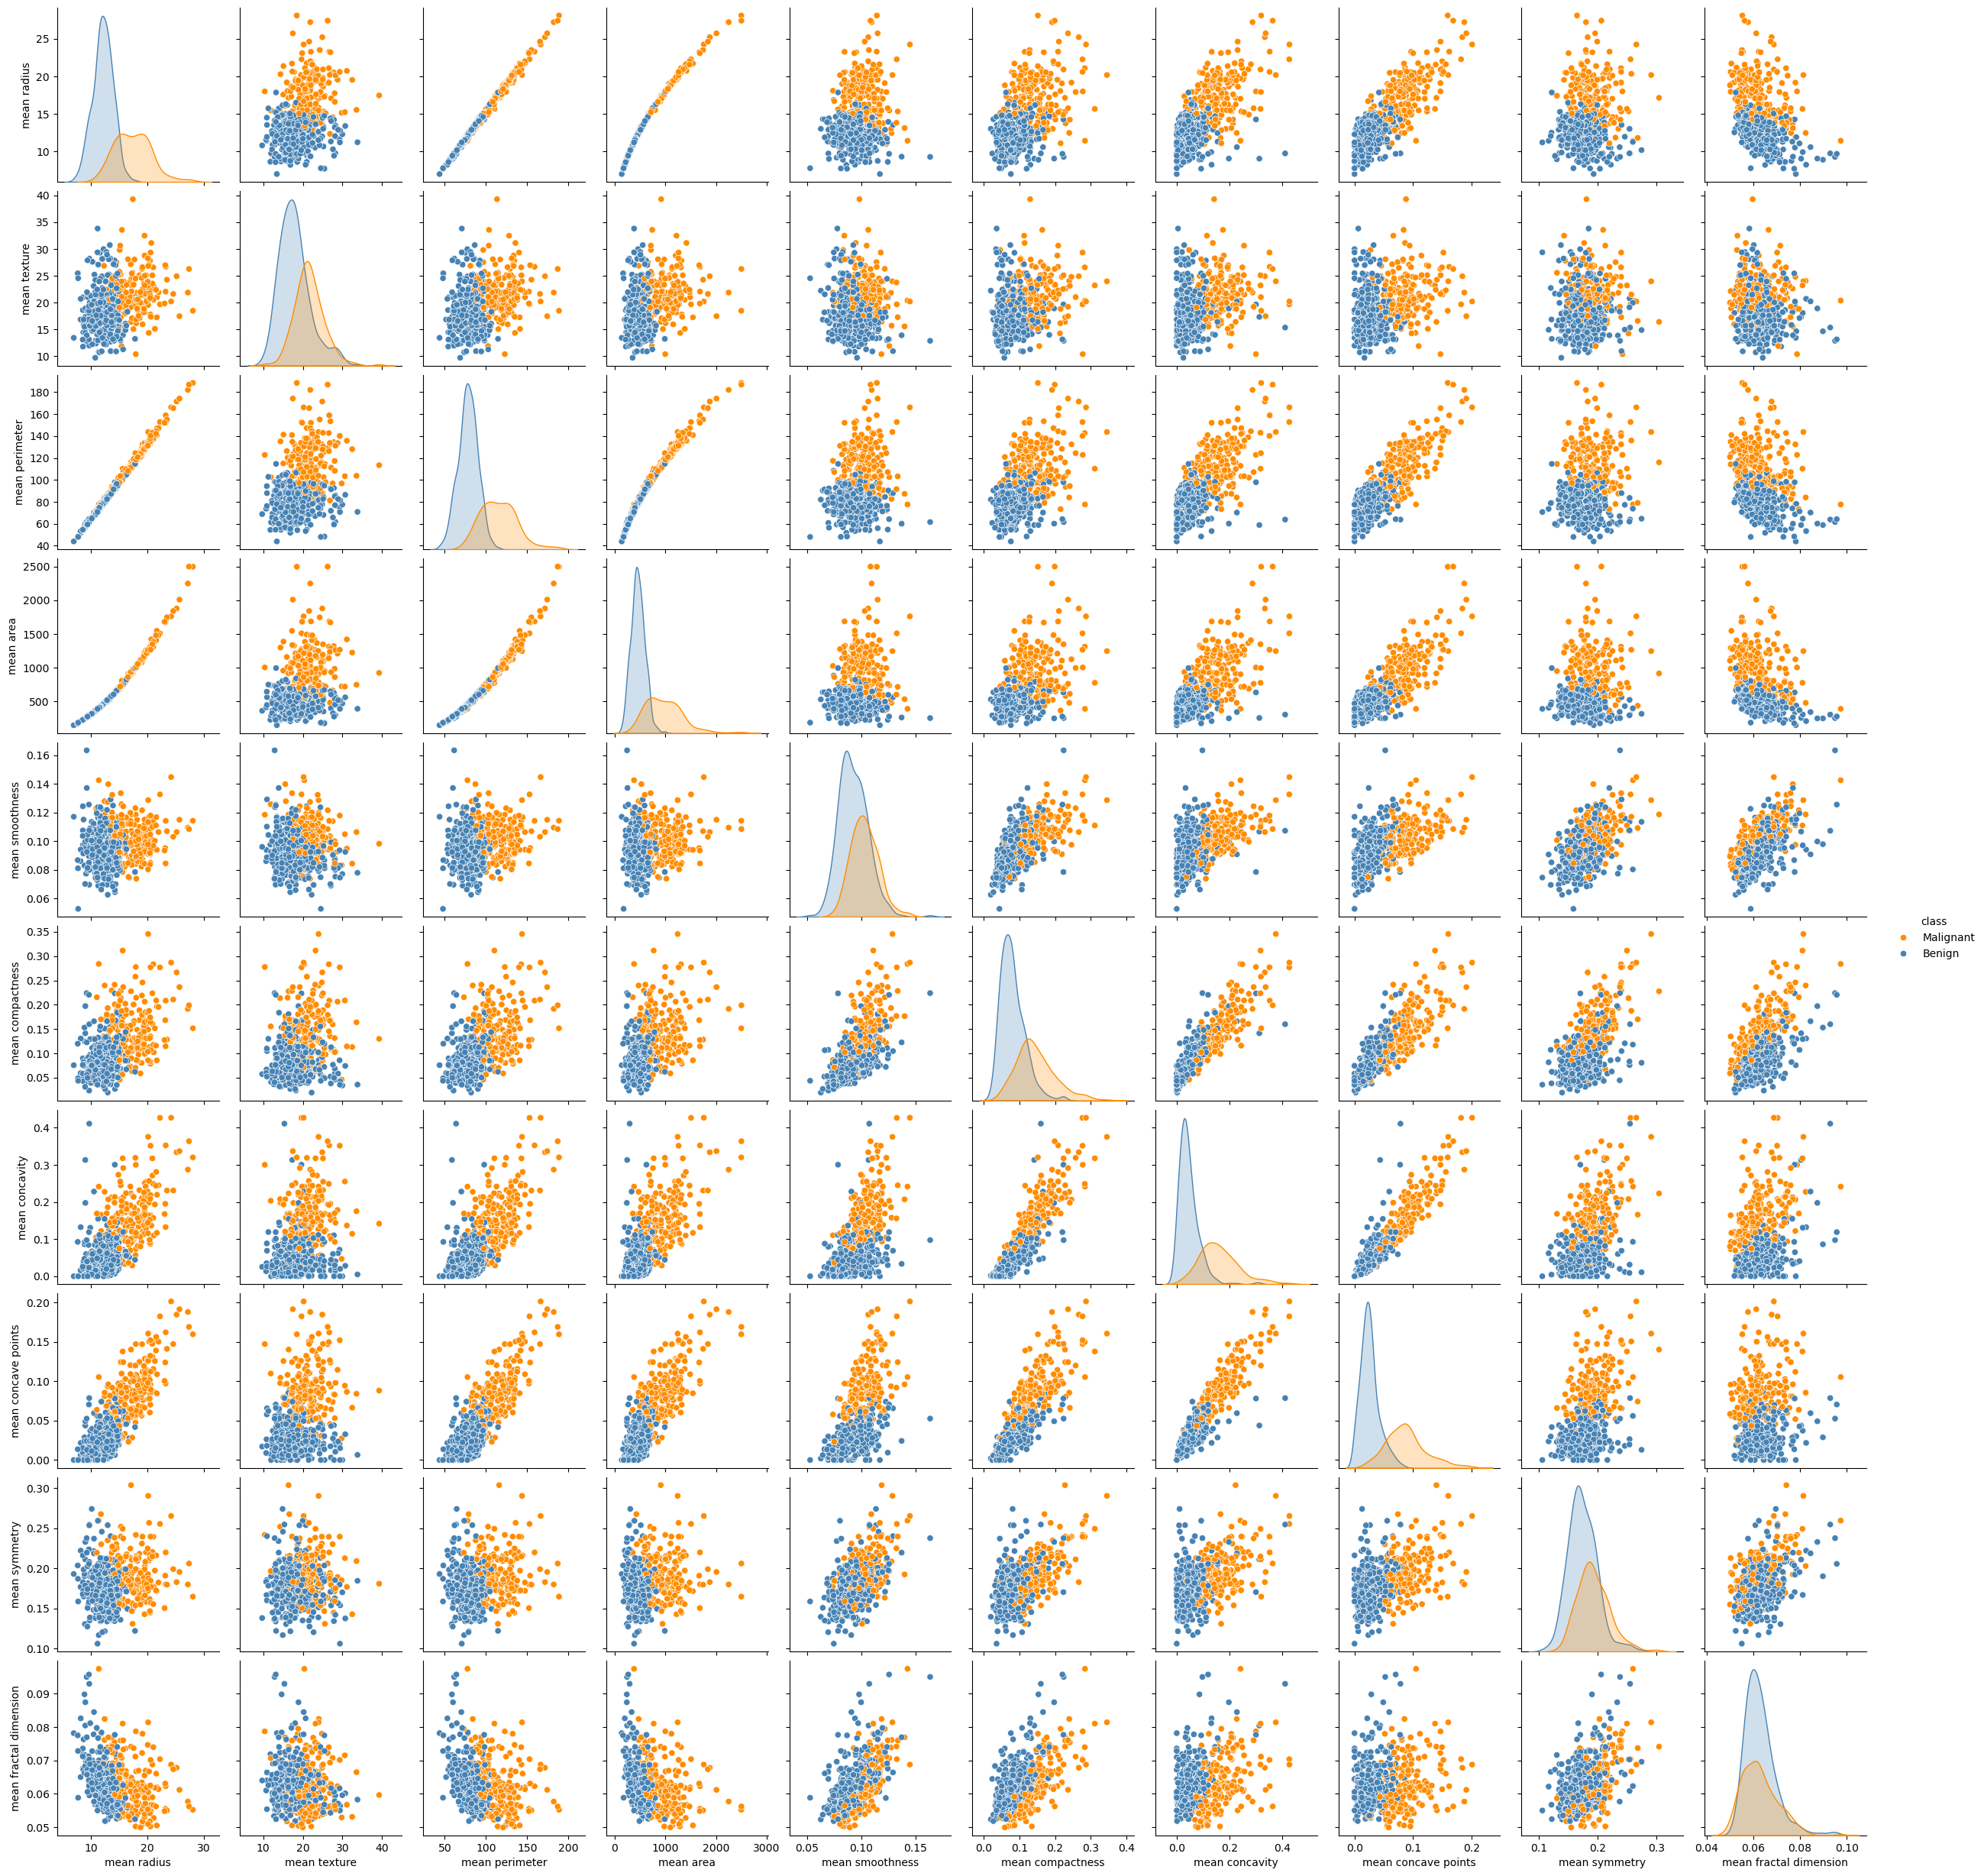

In [41]:
# Select the first 10 variables (columns) in the dataset
df_subset = df.iloc[:, :10]

# Add the column 'class' if you want to display the class in the pairplot as well
df_subset['class'] = data.target

# Create a mapping between numbers and labels
class_mapping = {0: 'Malignant', 1: 'Benign'}

# Apply mapping
df_subset['class'] = df_subset['class'].map(class_mapping)

# Create the pairplot
sns.pairplot(df_subset, hue='class', palette={'Malignant': 'darkorange', 'Benign': 'steelblue'})

plt.show()

#### Implementation and visualization of the decision tree

Creation and training of the decision tree

In [45]:
X, y = data.data, data.target  # Split of the dataset into data and class
depth = 2
clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Exporting the tree in DOT format

In [48]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=data.feature_names,
    class_names=data.target_names,  # class 0: malignant, class 1: benign
    filled=True,
    proportion=False,
    rounded=True,
    special_characters=True,
    node_ids=True
)

Visualization of the tree with graphviz

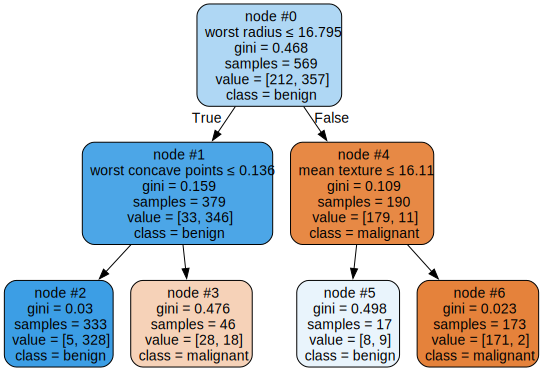

In [51]:
graph = graphviz.Source(dot_data)
display(graph)

#### Best Node Selection: calculation of the F-score for each node and selection of the best node

Access to the tree structure

In [55]:
tree = clf.tree_  # Object representing the structure of the tree
n_nodes = tree.node_count  # Total number of nodes in the tree
decision_path = clf.decision_path(X)  # Sparse representation indicating through which nodes each sample passes in the dataset

Functions to calculate precision, recall and F_beta

In [58]:
def calculate_precision(tp, fp):
    if (tp + fp) == 0:
        return 0
    return tp / (tp + fp)

def calculate_recall(tp, fn):
    if (tp + fn) == 0:
        return 0
    return tp / (tp + fn)

def calculate_f_beta(beta, precision, recall):
    if precision == 0 and recall == 0:
        return 0
    return (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

Iteration on each node

In [61]:
# Data for nodes
node_metrics = []

for node_id in range(n_nodes):
    # Find samples (list of indexes) passing through the node
    #samples_at_node = np.asarray(decision_path[:, node_id].toarray().ravel() == 1).nonzero()  # Does not return the correct number of samples
    samples_at_node = np.where(decision_path[:, node_id].toarray().ravel() == 1)[0]
    # Notes:
    # "decision_path" is a sparse array of (0, 1) with dimension (number of samples, number of nodes)
    # "decision_path[:, node_id]" returns a column of (0, 1) indicating, for each sample, whether or not it passes through a given node
    # ".toarray()" converts the column to a normal array (for working with NumPy arrays)
    # ".ravel()" flattens the array into a one-dimensional array
    # "np.where(...)" returns a tuple containing the indices of the values = 1 (n this case)
    # "[0]" directly extracts the index array of the tuple without the tuple "structure"

    # Number of samples crossing the node
    num_samples = len(samples_at_node)

    # If the node is empty, skip
    #if num_samples == 0:
    #    continue

    # Calculate the confusion matrix for the node
    y_true = y[samples_at_node]  # Extracts true class label values (y) for samples_at_node
    y_pred = np.argmax(tree.value[node_id])  # Node prediction (dominant class)
                                             # "tree.value[node_id]" is an array indicating how many samples belong to each class among those traversing the node (as a percentage)
                                             # "np.argmax(...)" finds the index of the maximum value of tree.value[node_id]
                                             # N.B. "tree.value[node_id]" assigns its predictions based on the class order of y_true, so the value of y_pred corresponds to the class of y_true by definition

    # Calculate TP, FP, TN, FN (analytically)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate precision, recall, F_beta
    precision = calculate_precision(tp, fp)
    recall = calculate_recall(tp, fn)
    beta = 1
    f_score = calculate_f_beta(beta, precision, recall)

    # Retrieve node impurity (Gini)
    impurity = tree.impurity[node_id]

    # Save results (dictionary)
    node_metrics.append({
        'node_id': node_id,
        'num_samples': num_samples,
        'impurity': impurity,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn,
        'precision': precision,
        'recall': recall,
        'f_score': f_score
    })

Conversion of results to a DataFrame

In [64]:
node_metrics_df = pd.DataFrame(node_metrics)

Visualization of results

In [67]:
print("Risultati per ciascun nodo:")
print(node_metrics_df)

Risultati per ciascun nodo:
   node_id  num_samples  impurity   tp   fp   tn  fn  precision  recall   f_score
0        0          569  0.467530  357  212    0   0   0.627417     1.0  0.771058
1        1          379  0.158980  346   33    0   0   0.912929     1.0  0.954483
2        2          333  0.029579  328    5    0   0   0.984985     1.0  0.992436
3        3           46  0.476371    0    0   28  18   0.000000     0.0  0.000000
4        4          190  0.109086    0    0  179  11   0.000000     0.0  0.000000
5        5           17  0.498270    9    8    0   0   0.529412     1.0  0.692308
6        6          173  0.022854    0    0  171   2   0.000000     0.0  0.000000


Best node according to F-score

In [70]:
best_node = node_metrics_df.loc[
    node_metrics_df.sort_values(by=['f_score', 'num_samples'], ascending=[False, False]).index[0]
]
# Notes:
# "sort_values(...)" sorts, in descending order, the DataFrame first by F-score and then, in case of a tie, by the number of samples
# ".index[0]" returns the first index of the sorted DataFrame
# ".loc[...]" selects the row of the DataFrame at the index found
# The command retrieves the whole row (i.e., the node) with the max value of f_score and with the max number of samples (given the same f_score)

print(best_node)

node_id          2.000000
num_samples    333.000000
impurity         0.029579
tp             328.000000
fp               5.000000
tn               0.000000
fn               0.000000
precision        0.984985
recall           1.000000
f_score          0.992436
Name: 2, dtype: float64


#### N-iterations of the Best Node Selection algorithm

Function for displaying the decision tree

In [74]:
def visualize_tree(clf):
    # Export tree in DOT format
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=data.feature_names,
        class_names=data.target_names,
        filled=True,
        proportion=False,
        rounded=True,
        special_characters=True,
        node_ids=True
    )
    
    # Graphical representation of the tree
    graph = graphviz.Source(dot_data)
    display(graph)
    
    # Save the decision tree as a PDF (in Listing 2)
    #graph.render(f"Tree{k + 1}", format="pdf", cleanup=True)

Function for calculating the best node

In [77]:
# Class flipping (to find "malignant" clusters instead of "benign" ones)
#y = 1 - y

# Decision tree training
clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
clf.fit(X, y)

# Access to the tree structure
tree = clf.tree_
n_nodes = tree.node_count
decision_path = clf.decision_path(X)

def calculate_best_node(y, tree, n_nodes, decision_path, beta):
    # Data for nodes
    node_metrics = []
    
    for node_id in range(n_nodes):
        # Find samples (list of indexes) passing through the node
        samples_at_node = np.where(decision_path[:, node_id].toarray().ravel() == 1)[0]

        # Number of samples crossing the node
        num_samples = len(samples_at_node)

        # Calculate the confusion matrix for the node
        y_true = y[samples_at_node]
        y_pred = np.argmax(tree.value[node_id])

        # Calculate TP, FP, TN, FN (analytically)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        # Calculate precision, recall, F_beta
        precision = calculate_precision(tp, fp)
        recall = calculate_recall(tp, fn)
        f_score = calculate_f_beta(beta, precision, recall)

        # Retrieve node impurity (Gini)
        impurity = tree.impurity[node_id]

        # Save results (dictionary)
        node_metrics.append({
            'node_id': node_id,
            'num_samples': num_samples,
            'impurity': impurity,
            'tp': tp,
            'fp': fp,
            'tn': tn,
            'fn': fn,
            'precision': precision,
            'recall': recall,
            'f_score': f_score
        })

    # Conversion of metrics to a DataFrame
    node_metrics_df = pd.DataFrame(node_metrics)

    # Visualization of results
    print("Results for each node:")
    print(node_metrics_df)
    print()

    # Extraction of the best node
    best_node = node_metrics_df.loc[
        node_metrics_df.sort_values(by=['f_score', 'num_samples'], ascending=[False, False]).index[0]
    ]

    return best_node

# Best node printing
best_node = calculate_best_node(y, tree, n_nodes, decision_path, beta=1)
print("Best node:")
print(best_node)

Results for each node:
   node_id  num_samples  impurity   tp   fp   tn  fn  precision  recall   f_score
0        0          569  0.467530  357  212    0   0   0.627417     1.0  0.771058
1        1          379  0.158980  346   33    0   0   0.912929     1.0  0.954483
2        2          333  0.029579  328    5    0   0   0.984985     1.0  0.992436
3        3           46  0.476371    0    0   28  18   0.000000     0.0  0.000000
4        4          190  0.109086    0    0  179  11   0.000000     0.0  0.000000
5        5           17  0.498270    9    8    0   0   0.529412     1.0  0.692308
6        6          173  0.022854    0    0  171   2   0.000000     0.0  0.000000

Best node:
node_id          2.000000
num_samples    333.000000
impurity         0.029579
tp             328.000000
fp               5.000000
tn               0.000000
fn               0.000000
precision        0.984985
recall           1.000000
f_score          0.992436
Name: 2, dtype: float64


Node decision path

In [80]:
# Function to extract decision conditions leading to a node
def get_node_path(tree, node_id, feature_names):
    node_path = []
    current_node = node_id
    
    # Go up the tree to the root
    while current_node != 0:  # Root node has index 0
        # Find the parent node
        #parent_node_without0 = np.where((tree.children_left == current_node) | (tree.children_right == current_node))
        #parent_node_one0 = np.where((tree.children_left == current_node) | (tree.children_right == current_node))[0]
        parent_node = np.where((tree.children_left == current_node) | (tree.children_right == current_node))[0][0]
        # Notes:
        # "np.where(...)" returns a tuple (as a structure) containing the index (id) of the parent node
        # "np.where(...)[0]" takes the first element of the tuple, which is a list
        # "np.where(...)[0][0]" takes the first element of the list, which is an integer (and that is what is needed)
        # Check:
        #print(f"Parent node without '[0]': {parent_node_without0}")
        #print(f"Parent node with one '[0]': {parent_node_one0}")
        #print(f"Parent node: {parent_node}")
        
        # Determine whether the current node is left or right child
        if tree.children_left[parent_node] == current_node:
            direction = '<='
        else:
            direction = '>'
        
        # Retrieve the feature and split value
        feature = feature_names[tree.feature[parent_node]]
        threshold = tree.threshold[parent_node]
        # Notes:
        # "tree.feature" contains the feature indices of the dataset
        # "tree.feature[parent_node]" extracts the split feature index for the parent node
        # "feature_names[tree.feature[parent_node]]" returns the name of the split feature
        
        # Save condition
        node_path.append(f"{feature} {direction} {threshold:.3f}")
        
        # Move to parent node
        current_node = parent_node
    
    # Reverse the order of the path to order it from the root to the leaf node
    return node_path[::-1]

# Node of interest (best_node)
best_node_id = int(best_node['node_id'])

# Extract path
node_path = get_node_path(tree, best_node_id, data.feature_names)

# View the path
print(f"Decision path of node {best_node_id}:")
for condition in node_path:
    print(condition)

Decision path of node 2:
worst radius <= 16.795
worst concave points <= 0.136


Removal of best node samples

In [83]:
def remove_node_samples(X, y, decision_path, node_id):
    # Find samples associated with the node
    samples_at_node = np.where(decision_path[:, node_id].toarray().ravel() == 1)[0]

    # Filter data by removing samples
    X_new = np.delete(X, samples_at_node, axis=0)
    y_new = np.delete(y, samples_at_node, axis=0)
    # Notes:
    # "X" and "y" are the matrices from which the samples are removed
    # "samples_at_node" are the indices of the samples to be removed
    # "axis=0" indicates that rows are removed (not columns)

    return X_new, y_new

# Node of interest (best node)
# N.B. If left to float it generates error in the function "remove_node_samples"
best_node_id = int(best_node['node_id'])

# Create new data without the best node samples
X_copy, y_copy = X.copy(), y.copy()
X_new, y_new = remove_node_samples(X_copy, y_copy, decision_path, best_node_id)

"Listing 2" algorithm

##### Iteration 1/3 #####


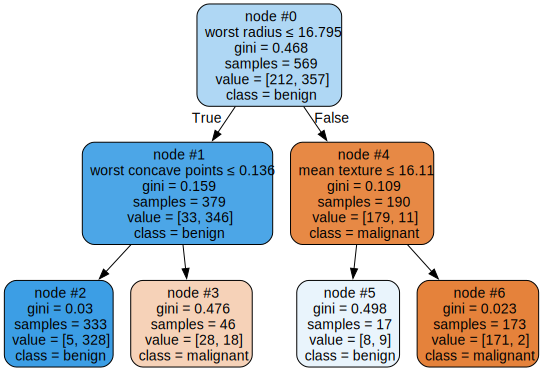

Results for each node:
   node_id  num_samples  impurity   tp   fp   tn  fn  precision  recall   f_score
0        0          569  0.467530  357  212    0   0   0.627417     1.0  0.771058
1        1          379  0.158980  346   33    0   0   0.912929     1.0  0.954483
2        2          333  0.029579  328    5    0   0   0.984985     1.0  0.992436
3        3           46  0.476371    0    0   28  18   0.000000     0.0  0.000000
4        4          190  0.109086    0    0  179  11   0.000000     0.0  0.000000
5        5           17  0.498270    9    8    0   0   0.529412     1.0  0.692308
6        6          173  0.022854    0    0  171   2   0.000000     0.0  0.000000

Best node at iteration 1:
node_id          2.000000
num_samples    333.000000
impurity         0.029579
tp             328.000000
fp               5.000000
tn               0.000000
fn               0.000000
precision        0.984985
recall           1.000000
f_score          0.992436
Name: 2, dtype: float64 

Decision

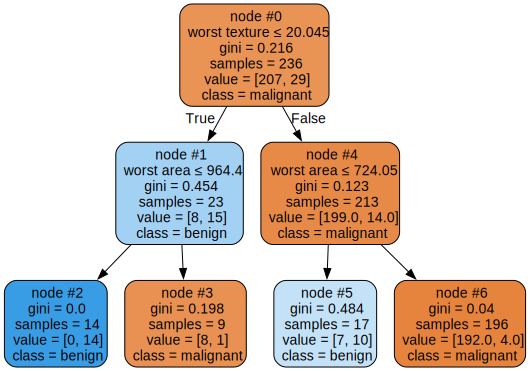

Results for each node:
   node_id  num_samples  impurity  tp  fp   tn  fn  precision  recall   f_score
0        0          236  0.215563   0   0  207  29   0.000000     0.0  0.000000
1        1           23  0.453686  15   8    0   0   0.652174     1.0  0.789474
2        2           14  0.000000  14   0    0   0   1.000000     1.0  1.000000
3        3            9  0.197531   0   0    8   1   0.000000     0.0  0.000000
4        4          213  0.122815   0   0  199  14   0.000000     0.0  0.000000
5        5           17  0.484429  10   7    0   0   0.588235     1.0  0.740741
6        6          196  0.039983   0   0  192   4   0.000000     0.0  0.000000

Best node at iteration 2:
node_id         2.0
num_samples    14.0
impurity        0.0
tp             14.0
fp              0.0
tn              0.0
fn              0.0
precision       1.0
recall          1.0
f_score         1.0
Name: 2, dtype: float64 

Decision path of the best node:
worst texture <= 20.045
worst area <= 964.400

#####

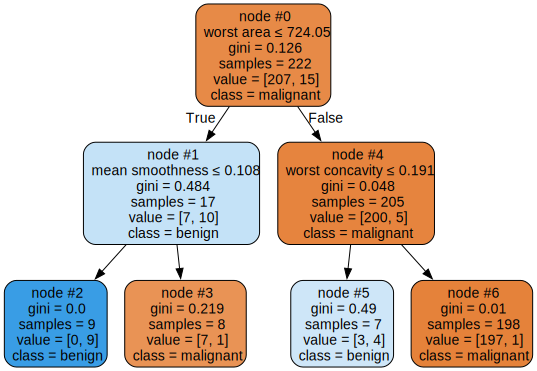

Results for each node:
   node_id  num_samples  impurity  tp  fp   tn  fn  precision  recall   f_score
0        0          222  0.126004   0   0  207  15   0.000000     0.0  0.000000
1        1           17  0.484429  10   7    0   0   0.588235     1.0  0.740741
2        2            9  0.000000   9   0    0   0   1.000000     1.0  1.000000
3        3            8  0.218750   0   0    7   1   0.000000     0.0  0.000000
4        4          205  0.047591   0   0  200   5   0.000000     0.0  0.000000
5        5            7  0.489796   4   3    0   0   0.571429     1.0  0.727273
6        6          198  0.010050   0   0  197   1   0.000000     0.0  0.000000

Best node at iteration 3:
node_id        2.0
num_samples    9.0
impurity       0.0
tp             9.0
fp             0.0
tn             0.0
fn             0.0
precision      1.0
recall         1.0
f_score        1.0
Name: 2, dtype: float64 

Decision path of the best node:
worst area <= 724.050
mean smoothness <= 0.108



In [86]:
# Copy data for iteration
X_copy, y_copy = X.copy(), y.copy()

# Number of iterations
N = 3
# Depth of the decision tree
depth_it = 2
# Beta parameter
beta = 1

for k in range(N):
    print(f"##### Iteration {k + 1}/{N} #####")

    # Training the decision tree
    clf = DecisionTreeClassifier(max_depth=depth_it, random_state=42)
    clf.fit(X_copy, y_copy)

    # Graphical representation of the tree
    visualize_tree(clf)

    # Access to the tree structure
    tree = clf.tree_
    n_nodes = tree.node_count
    decision_path = clf.decision_path(X_copy)

    # Calculation of the best node
    best_node = calculate_best_node(y_copy, tree, n_nodes, decision_path, beta)

    # Best node ID
    best_node_id = int(best_node['node_id'])

    # Extraction of node decision path
    node_path = get_node_path(tree, best_node_id, data.feature_names)

    # Removal of samples associated with the best node
    X_copy, y_copy = remove_node_samples(X_copy, y_copy, decision_path, best_node_id)

    # Printing the best node and its metrics
    print(f"Best node at iteration {k + 1}:")
    print(best_node, "\n")
    
    # Printing the decision path of the best node
    print(f"Decision path of the best node:")
    for condition in node_path:
        print(condition)
    print()